In [34]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from DateTime import DateTime

The goal of this analysis is to check if higher taxes account for higher revenue

In [62]:
df_low = pd.read_csv('IITTRLB.csv')
df_high = pd.read_csv('IITTRHB.csv')
df_incometax = pd.read_csv('A074RC1Q027SBEA.csv')
df_gdp = pd.read_csv('GDP.csv')

In [63]:
df_high['DATE'] = pd.to_datetime(df_high['DATE'])
df_low['DATE'] = pd.to_datetime(df_low['DATE'])
df_incometax['DATE'] = pd.to_datetime(df_incometax['DATE'])
df_gdp['DATE'] = pd.to_datetime(df_gdp['DATE'])

In [64]:
df_high = df_high.set_index('DATE')
df_low = df_low.set_index('DATE')
df_incometax = df_incometax.set_index('DATE')
df_gdp = df_gdp.set_index('DATE')

In [65]:
df = df_high.join(df_low).join(df_incometax).join(df_gdp)

In [66]:
df.dropna(inplace=True)

In [69]:
df.columns = ['High_Bracket','Low_Bracket','Revenue', 'GDP']

In [70]:
df['Rev_GDP'] = df['Revenue']/df['GDP']

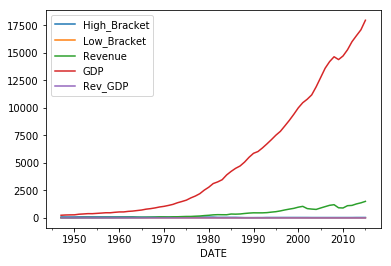

In [71]:
df.plot()

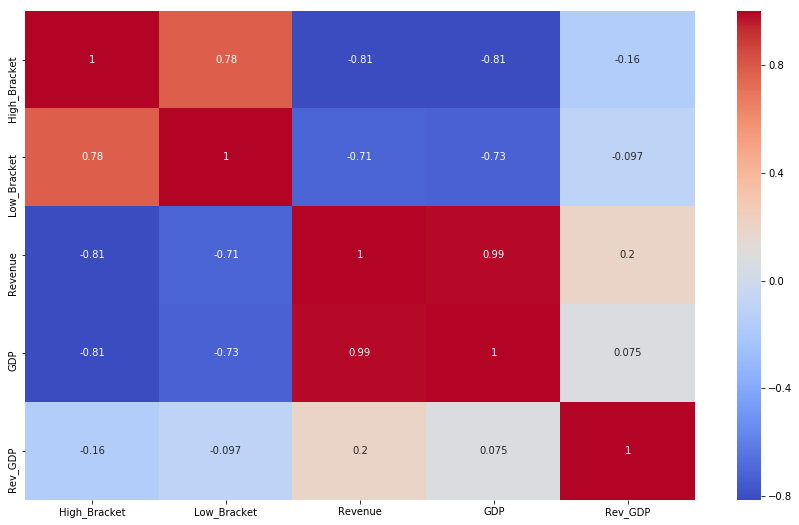

In [72]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

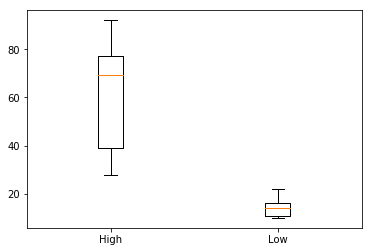

In [74]:
plt.boxplot([df['High_Bracket'], df['Low_Bracket']])
plt.xticks([1,2], ['High','Low'])
plt.show()

In [75]:
X = df.drop(['GDP','Rev_GDP','Revenue'], axis=1)
y = df['Rev_GDP']

In [76]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)
print('coefficients: ' + str(lm.coef_))
print('intercept: ' + str(lm.intercept_))
print('score: ' + str(lm.score(X,y)))

coefficients: [-7.64602626e-05  1.54224270e-04]
intercept: 0.07959885730411873
score: 0.027535976508435978


In [77]:
from sklearn.linear_model import HuberRegressor
hr = HuberRegressor()
hr.fit(X,y)
print('coefficients: ' + str(hr.coef_))
print('intercept: ' + str(hr.intercept_))
print('score: ' + str(hr.score(X,y)))

coefficients: [-3.45823250e-05  3.48299753e-06]
intercept: 0.07899454186107917
score: 0.020117592264670137


Tried to somewhat normalize the tax revenue data by making it a percentage of gdp, but the accuracy went down completely and the coeficients are insignificant. Doesn't seem like a good decision

Going to try to run a regression of tax rates and gdp, to see how the top and lower marginal rates affect GDP

In [78]:
X2 = df[['High_Bracket','Low_Bracket']]
y2 = df['GDP']

In [79]:
lm2 = LinearRegression()
lm2.fit(X2,y2)
print('coefficients: ' + str(lm2.coef_))
print('intercept: ' + str(lm2.intercept_))
print('score: ' + str(lm2.score(X2,y2)))

coefficients: [-151.32209581 -358.74179972]
intercept: 19477.33802086454
score: 0.6833593585649649


In [80]:
hr2 = HuberRegressor()
hr2.fit(X2,y2)
print('coefficients: ' + str(hr2.coef_))
print('intercept: ' + str(hr2.intercept_))
print('score: ' + str(hr2.score(X2,y2)))

coefficients: [-172.92436672  -54.45086474]
intercept: 15957.982623838816
score: 0.6576471398687026


In this case, the models were much more accurate, with the classical regression being 3% more accurate. The intercept of 15,957 is large, but the GDP figures are large as well. Both have a negative coeficient, meaning higher taxes hurt GDP. The high bracket coefficient is about 3 times as large as the low bracket, which makes sense to me since the highest bracket directly impacts capital invesments in factories and in banking activities. 